# Packages and Functions


In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd

import os
import sys

# Paths
os.chdir("/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/")
add_dir = "/Users/antoniosquicciarini/ownCloud/PhD Projects/General_Functions/"
sys.path.insert(1, add_dir)
add_dir = "/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/Programs"
sys.path.insert(1, add_dir)
"/Volumes/T7/EEG_Data/EEG_IM_objs/chb01__2023_2_6_19_21/chb01_04/chb01_04_seizure1.obj"
#%% Upload an obj
def load_object(filename):
    with open(filename, 'rb') as file:
        obj = pickle.load(file)
    return obj 

obj = load_object("/Volumes/T7/EEG_Data/EEG_IM_objs/chb01__2023_2_6_19_21/chb01_04/chb01_04_seizure1.obj") #EOFError: Ran out of input

In [2]:
print(obj.IM_T_Ent.shape)
ch = 10
analysis_points = (obj.time_ref >= obj.t_min_plot)  & (obj.time_ref <= obj.t_MAX_plot)
analysis_points_raw_data = (obj.time >= obj.t_min_plot)  & (obj.time <= obj.t_MAX_plot)

Ix = np.transpose(obj.IM_F_Inf[obj.IM_F_Inf_Best_Channel, analysis_points])

Nx = np.exp(2*np.transpose(obj.IM_S_Ent[obj.IM_S_Ent_Best_Channel, analysis_points]))/(2*np.exp(1)*np.pi)

print(obj.IM_S_Ent_Best_Channel)
print(obj.IM_F_Inf_Best_Channel)

Cx = Ix*Nx

(23, 597, 5)
10
14


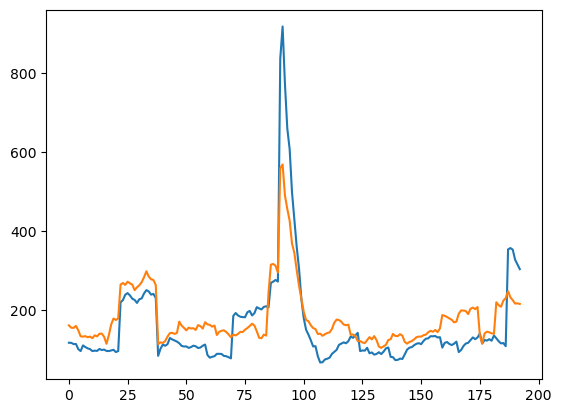

In [3]:
plt.plot( np.transpose(obj.IM_F_Inf[obj.IM_F_Inf_Best_Channel, analysis_points]))
plt.plot( np.transpose(obj.IM_F_Inf[obj.IM_S_Ent_Best_Channel, analysis_points]))


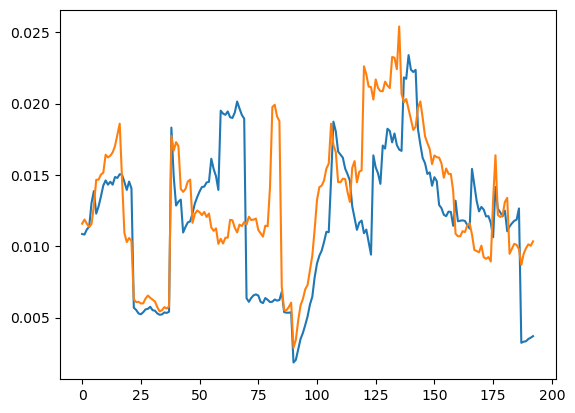

In [4]:
plt.plot(np.exp(2*np.transpose(obj.IM_S_Ent[obj.IM_F_Inf_Best_Channel, analysis_points]))/(2*np.exp(1)*np.pi))
plt.plot(np.exp(2*np.transpose(obj.IM_S_Ent[obj.IM_S_Ent_Best_Channel, analysis_points]))/(2*np.exp(1)*np.pi))


10
14


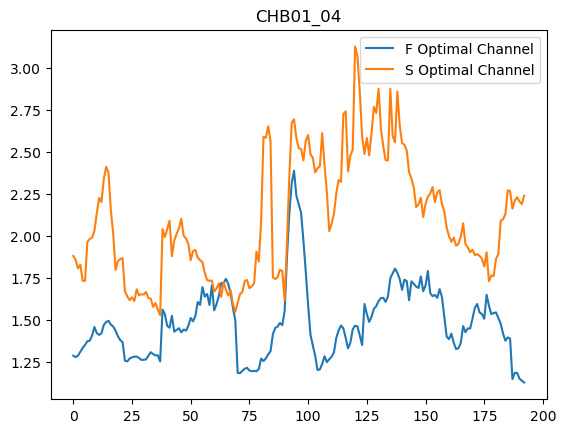

In [18]:
plt.plot(np.exp(2*np.transpose(obj.IM_S_Ent[obj.IM_F_Inf_Best_Channel, analysis_points]))/(2*np.exp(1)*np.pi)*\
         np.transpose(obj.IM_F_Inf[obj.IM_F_Inf_Best_Channel, analysis_points]), label ='F Optimal Channel')

plt.plot(np.exp(2*np.transpose(obj.IM_S_Ent[obj.IM_S_Ent_Best_Channel, analysis_points]))/(2*np.exp(1)*np.pi)*\
         np.transpose(obj.IM_F_Inf[obj.IM_S_Ent_Best_Channel, analysis_points]), label ='S Optimal Channel')

plt.legend()
plt.title("CHB01_04")

print(obj.IM_S_Ent_Best_Channel)
print(obj.IM_F_Inf_Best_Channel)

[1.00451125 0.85759142 0.83507772 0.78582327 0.87375332 0.70767317
 1.12437638 1.05724588 0.80839443 1.17274927 0.87651016 0.86200092
 0.77056186 1.33106807 1.32290268 0.99277105 1.03660026 0.88897329
 0.83507772 0.71954062 1.23945739 0.66321763 1.32290268]
13


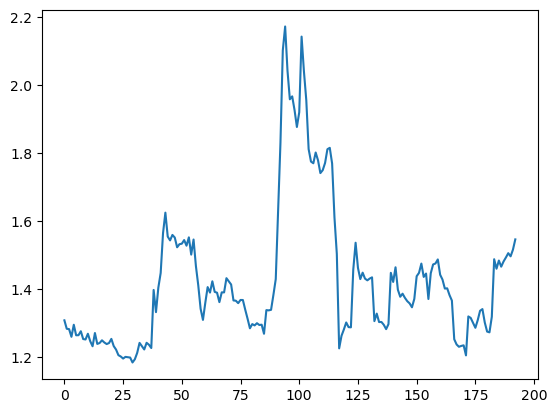

In [17]:
Ictal_Indx = np.array((obj.time_ref >= obj.seizure_start) & (obj.time_ref <= obj.seizure_end + obj.DeltaX/obj.sfreq))
No_Ictal_Indx = np.invert(Ictal_Indx)

lista_ict = []
lista_noict = []

for ch_indx in range(obj.IM_S_Ent.shape[0]):
    lista_ict.append(np.exp(2*np.transpose(obj.IM_S_Ent[ch_indx, Ictal_Indx]))/(2*np.exp(1)*np.pi)*\
                np.transpose(obj.IM_F_Inf[ch_indx, Ictal_Indx]))
    lista_noict.append(np.exp(2*np.transpose(obj.IM_S_Ent[ch_indx, No_Ictal_Indx]))/(2*np.exp(1)*np.pi)*\
                np.transpose(obj.IM_F_Inf[ch_indx, No_Ictal_Indx]))

lista_ict = np.array(lista_ict)
lista_noict = np.array(lista_noict)

lista_ict = np.array(lista_ict)
lista_noict = np.array(lista_noict)

lista_ict = np.max(lista_ict, axis = 1)
lista_noict = np.max(lista_noict, axis = 1)

print(lista_ict/lista_noict)

ch = np.argmax(lista_ict/lista_noict)
print(ch)

plt.plot(np.exp(2*np.transpose(obj.IM_S_Ent[ch, analysis_points]))/(2*np.exp(1)*np.pi)*\
         np.transpose(obj.IM_F_Inf[ch, analysis_points]), label ='S Optimal Channel')
#lista.shape

In [7]:
obj.IM_S_Ent.shape[0]

23

In [ ]:
# Shannon verification with Gaussian Distr

sigm = 5
mean = 3
q = 3

x = np.linspace(-7*sigm+mean, 7*sigm+mean, 1000000)
delta = x[1]-x[0]
gaussian_function = 1/sigm * time_signal.Gaussian_Kernel((x-mean)/sigm)
plt.plot(x, gaussian_function)

SE_Num = time_signal.ShannonEntropy(gaussian_function, delta)
SEP_Num = np.exp(2*time_signal.ShannonEntropy(gaussian_function, delta))/(2*np.exp(1)*np.pi)
SE_Ana = 1/2 * np.log(2 * np.pi * np.e * sigm**2)
SEP_Ana = sigm**2

TS_Num = time_signal.TsallisEntropy(gaussian_function, delta, q)
TS_Ana = 1/(q-1) * (1 - 1/(q**(1/2) * ((2*np.pi)**(1/2) * sigm)**(q-1)) )

FI_Num = time_signal.FisherInformation(gaussian_function, delta)
FI_Ana = 1/sigm**2

In [17]:
SEP_Num*FI_Num


0.9999999997225625